# DM probabilités
**COMMUNAL Jean-Pierre Louis, LESBRE Viviane**

On fait les imports nécessaires et on copie le code de l'année dernière :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

#Fonction C

def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)

distmat=abs(np.subtract.outer(discretization,discretization))

Sigma=Covexp(distmat,a,sigma2)

SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]

invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
'''plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()'''

SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
'''plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()'''

Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
'''plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')'''
#plt.show()

def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)

sum(result)/K
length(allval1,Delta)

indice_simu = 1+np.arange(K)
'''plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()'''

#plt.hist(result,50,density=True)
#plt.show()

Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

np.quantile(result,[0.025,0.975])

np.mean(result>525)

# Question 1 :
On code un algorithme de rejet

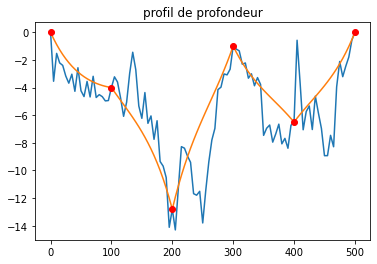

In [113]:
Ec1= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

def rejet(Ec):
    
    positif = True
    Cholesky = np.linalg.cholesky(SigmaCond)
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec1 + np.matmul(Cholesky,x)
    
    while positif :
        simu_neg = np.array(simu<0)
        
        if  simu_neg.all():
            positif = False
        else :
            x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
            simu = Ec1 + np.matmul(Cholesky,x)
            
    allval5 = np.zeros(N)
    allval5[unknown_indexes]=simu
    allval5[observation_indexes]=depth
        
    return allval5

allval5 = rejet(Ec1)
plt.plot(discretization,allval5)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')

plt.title("profil de profondeur");

# Question 2:
On cherche donc à calculer la longeur moyenne de cable pour ce nouveau profil:

In [99]:
K=1000
result_new = np.zeros(K)
for i in range(K):
    allval5 = rejet(Ec1)#à chaque itération on choisi un tracé avec la méthode du rejet
    result_new[i]=length(allval5,Delta)

result.mean()

522.4250111968523

On trace l'histogramme:

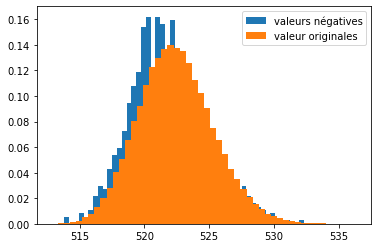

In [100]:
plt.subplots()
axe1 = plt.hist(result_new,50,density=True, label ='valeurs négatives')
axe2 = plt.hist(result,50,density = True, label = 'valeur originales')
plt.legend()
plt.show()

In [101]:
#Vieilles données
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

print(np.quantile(result,[0.025,0.975]))

#Nouvelles données
Ln = sum(result_new)/K
sigman = np.std(result_new)
[Ln - sigman*1.96,Ln + sigman*1.96]

print(np.quantile(result_new,[0.025,0.975]))

[517.11452581 528.40779236]
[516.66299451 528.17128821]


In [102]:
print(np.mean(result>525))
print(np.mean(result_new>525))

0.18277
0.136


On calcul le taux de rejet sur 10000 essais

In [74]:
def taux_rejet():
    
    rejet = 1
    positif = True
    Cholesky = np.linalg.cholesky(SigmaCond)
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)
    
    while positif :
        simu_neg = np.array(simu<0)
        if  simu_neg.all():
            positif = False
        else :
            x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
            simu = Ec + np.matmul(Cholesky,x)
            rejet +=1
    return 1/rejet

rejet = 0
for k in range (10000):
    rejet += taux_rejet()
1-rejet/10000

0.8733414641117233

Le taux de rejet est donc d'environ 87%.

# Question 4 :
On a 
$$ 
f_{W,X}(x,w)=f_{X|W=w](x) * f_{

# Question 5:
On identifie avec la question 4 les différents termes pui on identifie :
    - $f_{Z_{UKN}|\mu =\mu *,Z_{obs}=z_{obs}}$ matrice normale
    - l'autre : vecteur gaussien à densité

# Question 7:
On applique la technique de Box-Muller pour simuler une variable aléatoire gaussienne.

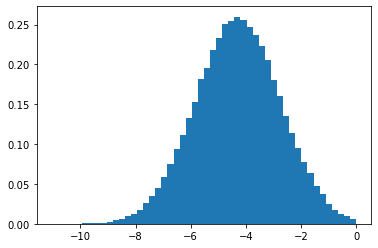

In [106]:
n = 100000 #nombre de points
mu_hat = -4.29
sigma_hat = 1.54

def simu2(n):
    W = np.empty(n)
    i = 0
    while i < n:
        U = np.random.rand(1)
        V = np.random.rand(1)
        X = mu_hat + np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)*sigma_hat
        if X < 0:
            W[i] = X
            i += 1
    return W
    

plt.hist(simu2(n),50, density = True)
plt.show()

# Question 8:

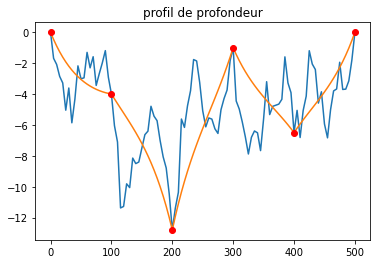

In [116]:
def simu_couple():
    mu = simu2(1)
    Ec2 = mu + np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth - mu))
    simu = rejet(Ec2)
    return  simu, mu

simu, mu = simu_couple()
plt.plot(discretization,simu)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')

plt.title("profil de profondeur");


# Question 9:


In [122]:
K=10000
result_new2 = np.zeros(K)
for i in range(K):
    allval5 = rejet(Ec1)#à chaque itération on choisi un tracé avec la méthode du rejet
    result_new2[i]=length(allval5,Delta)


result_new2.mean()

521.8150562008716

Pour le convergence:

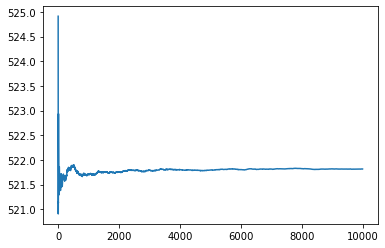

In [123]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result_new2)/indice_simu)
plt.show()

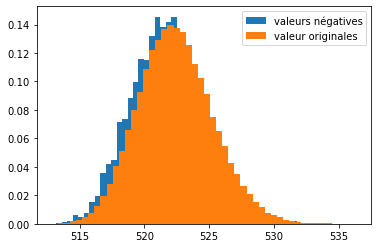

In [124]:
plt.subplots()
axe1 = plt.hist(result_new2,50,density=True, label ='valeurs négatives')
axe2 = plt.hist(result,50,density = True, label = 'valeur originales')
plt.legend()
plt.show()

In [125]:
#Vieilles données
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

print(np.quantile(result,[0.025,0.975]))

#Nouvelles données
Ln = sum(result_new2)/K
sigman = np.std(result_new2)
[Ln - sigman*1.96,Ln + sigman*1.96]

print(np.quantile(result_new2,[0.025,0.975]))

[517.11452581 528.40779236]
[516.62715655 527.64963736]


In [126]:
print(np.mean(result>525))
print(np.mean(result_new2>525))

0.18277
0.1338


# Question 10 :
